<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.767994  31.185492  20.784129  ...   87.201886   86.206844  0.995042
      1.0    74.907063  79.029271  67.977870  ...  230.585926  232.050244 -1.464317
      2.0    27.129189  43.359219  85.352320  ...  166.137358  166.087973  0.049386
      3.0    77.659046  51.885681  28.366975  ...  166.800139  167.226483 -0.426345
      4.0    27.651915  91.679287  92.014349  ...  221.982578  222.389773 -0.407195
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.469248  28.265622  37.635560  ...  117.702257  118.440149 -0.737892
      26.0   90.955938  37.827941  64.491238  ...  201.487115  203.053259 -1.566144
      27.0   37.346002  71.405708  61.226719  ...  180.963472  180.088958  0.874514
      28.0   86.769203  40.527873  60.374476  ...  196.597711  197.467855 -0.870144
      29.0   23.435685  96.033854  23.894682  ...  152.989434  153.472613 -0.483179

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.767994  31.185492  20.784129  ...   87.201886   86.206844  0.995042
      1.0    74.907063  79.029271  67.977870  ...  230.585926  232.050244 -1.464317
      2.0    27.129189  43.359219  85.352320  ...  166.137358  166.087973  0.049386
      3.0    77.659046  51.885681  28.366975  ...  166.800139  167.226483 -0.426345
      4.0    27.651915  91.679287  92.014349  ...  221.982578  222.389773 -0.407195
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.469248  28.265622  37.635560  ...  117.702257  118.440149 -0.737892
      26.0   90.955938  37.827941  64.491238  ...  201.487115  203.053259 -1.566144
      27.0   37.346002  71.405708  61.226719  ...  180.963472  180.088958  0.874514
      28.0   86.769203  40.527873  60.374476  ...  196.597711  197.467855 -0.870144
      29.0   23.435685  96.033854  23.894682  ...  152.989434  153.472613 -0.483179

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.767994  31.185492  20.784129  ...   87.201886   86.206844  0.995042
      1.0    74.907063  79.029271  67.977870  ...  230.585926  232.050244 -1.464317
      2.0    27.129189  43.359219  85.352320  ...  166.137358  166.087973  0.049386
      3.0    77.659046  51.885681  28.366975  ...  166.800139  167.226483 -0.426345
      4.0    27.651915  91.679287  92.014349  ...  221.982578  222.389773 -0.407195
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.469248  28.265622  37.635560  ...  117.702257  118.440149 -0.737892
      26.0   90.955938  37.827941  64.491238  ...  201.487115  203.053259 -1.566144
      27.0   37.346002  71.405708  61.226719  ...  180.963472  180.088958  0.874514
      28.0   86.769203  40.527873  60.374476  ...  196.597711  197.467855 -0.870144
      29.0   23.435685  96.033854  23.894682  ...  152.989434  153.472613 -0.483179

[30000 rows x 7 columns]

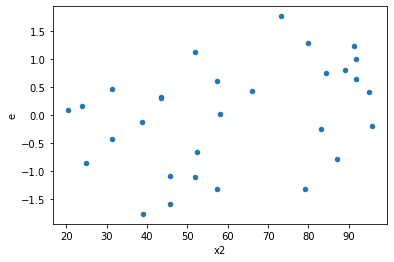

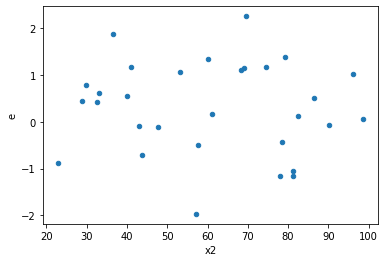

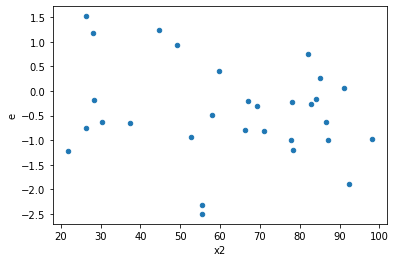

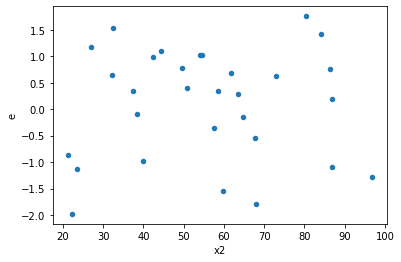

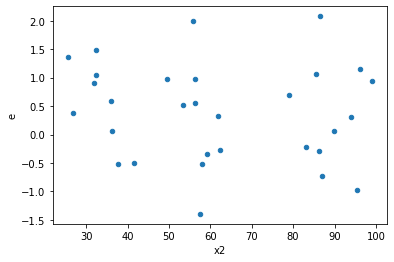

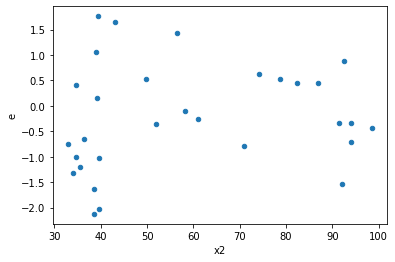

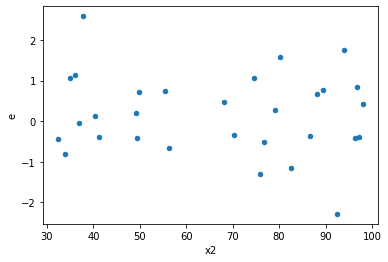

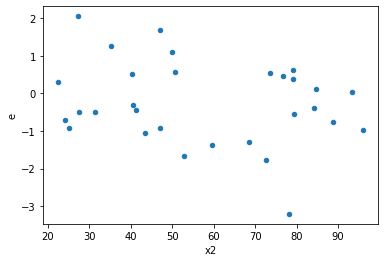

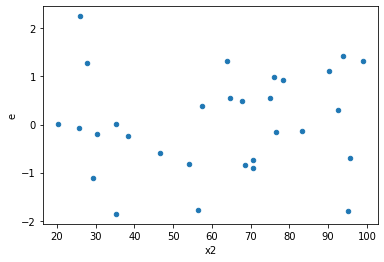

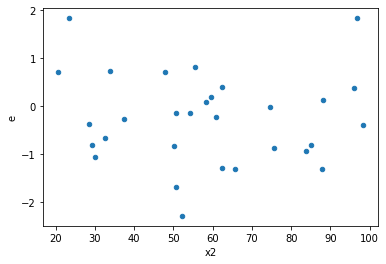

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,12.0,6.045050570159179,9.690500644908813,0.5037542141799316,0.8075417204090677,1.6030470766853553,0.42548386389040127,0.7872580680547994,0.21274193194520064,Reject001=1 : Homoscedasticity
4.0,14.0,10.0,5.741271712207634,5.104462284032009,0.4100908365862596,0.510446228403201,1.2447150310705184,0.7409188190125522,0.6295405904937239,0.3704594095062761,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,4.489582732480077,15.965142527088798,0.40814388477091607,1.2280878866991383,3.0089581947024446,0.06264957637445634,0.9686752118127718,0.03132478818722817,Reject001=1 : Homoscedasticity
8.0,11.0,13.0,8.385984095473287,18.104356795269908,0.7623621904975715,1.3926428304053775,1.8267469816366946,0.3003288583494732,0.8498355708252634,0.1501644291747366,Reject001=1 : Homoscedasticity
9.0,7.0,17.0,6.101345253144703,16.536936446064285,0.8716207504492433,0.9727609674155462,1.1160369540470143,0.7952262289747152,0.6023868855126424,0.3976131144873576,Reject001=1 : Homoscedasticity
10.0,11.0,13.0,12.183300073106729,15.058516815797438,1.1075727339187935,1.1583474473690336,1.0458432316860942,0.9266298067052294,0.5366850966473853,0.4633149033526147,Reject001=1 : Homoscedasticity
12.0,15.0,9.0,11.714285663533063,8.683186429485064,0.7809523775688709,0.964798492165007,1.2354127087345004,0.7691496851106308,0.6154251574446846,0.3845748425553154,Reject001=1 : Homoscedasticity
15.0,13.0,11.0,14.860562709810464,25.804014213649822,1.1431202084469587,2.3458194739681657,2.0521196779078834,0.23995664409113537,0.8800216779544323,0.11997832204556769,Reject001=1 : Homoscedasticity
17.0,12.0,12.0,7.722740748638208,8.906231846871362,0.643561729053184,0.7421859872392802,1.1532475498988939,0.8089560269195064,0.5955219865402468,0.4044780134597532,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,12.0,6.045050570159179,9.690500644908813,0.5037542141799316,0.8075417204090677,1.6030470766853553,0.42548386389040127,Reject001=1 : Homoscedasticity
1.0,11.0,13.0,11.344269906948567,13.25939233451469,1.0312972642680516,1.01995325650113,0.98900025418474,0.99806895809328,Reject001=1 : Homoscedasticity
2.0,10.0,14.0,10.674312889882232,12.037486251547556,1.0674312889882231,0.8598204465391112,0.8055042562543784,0.7441824546421335,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,16.426152271153516,8.536548244873458,1.1732965907966797,0.8536548244873459,0.72756950900855,0.5698010090360769,Reject001=1 : Homoscedasticity
4.0,14.0,10.0,5.741271712207634,5.104462284032009,0.4100908365862596,0.510446228403201,1.2447150310705184,0.7409188190125522,Reject001=1 : Homoscedasticity
5.0,17.0,7.0,20.673628666554038,7.662131939394431,1.2160958039149434,1.0945902770563474,0.900085563598331,0.8006740132750553,Reject001=1 : Homoscedasticity
6.0,9.0,15.0,10.651789165098485,11.06257325798751,1.1835321294553873,0.7375048838658339,0.6231388785407991,0.47877281016879175,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,4.489582732480077,15.965142527088798,0.40814388477091607,1.2280878866991383,3.0089581947024446,0.06264957637445634,Reject001=1 : Homoscedasticity
8.0,11.0,13.0,8.385984095473287,18.104356795269908,0.7623621904975715,1.3926428304053775,1.8267469816366946,0.3003288583494732,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      981
Reject001=0 : Heteroscedasticity     19
Name: Result_test, dtype: int64